In [ ]:
(/inputs)
do shape
do balue counts
left=stock, right=firms ,left on= ['permno', 'year'], right _on=['permno','fyear'], how='inner')

In [ ]:
(
    sample.pivot_table(index='ind',columns='state', values='permno', aggfunc=['nunique','count'])
    .stack(level=0)
)

.style.format("{:.3f}") == this makes only 3 decimals 


always group. by firm and year

# Practicing on Diamonds


tall vs long dataset
-do whatever is the easiet, pandas has many functions to plot by these

pd.bar

AxesSubplot(0.125,0.125;0.775x0.755)


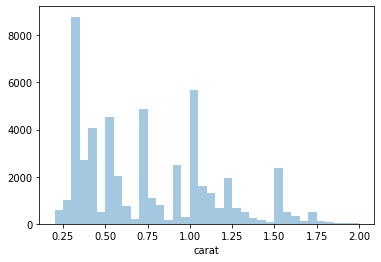

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np

diamonds = sns.load_dataset('diamonds')
diamonds # notice shape, unit, key, etc...

# my turn: lets do the usual immediate explorations including the categorical vars
diamonds.describe()
# my turn: explore carats - how many are 0.99 vs 1 carat? why?
# sns.countplot(diamonds['carat'])
# explore dist of x, y, z: what did you learn? which is width, length, depth?
print(sns.distplot(diamonds['carat'], kde=False, bins=np.arange(0.2,2.05,.05).tolist()))


# your turn: explore price - is there anything unusual? (HINT: try many bin widths)

# my turn: how is carat related to price?
# your turn: how is price related to cut?

# how should we deal with outliers? delete obs? replace with nan? winsorize? show each...


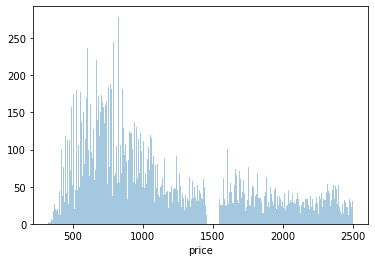

In [25]:
#your turn: explore price - is there anything unusual? (HINT: try many bin widths)
sns.distplot(diamonds.query('price<2500')['price'], kde=False,bins=500)


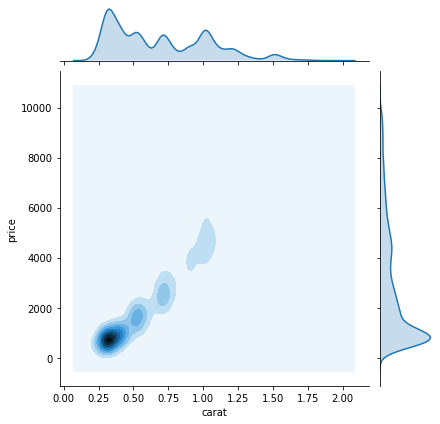

In [28]:
sns.jointplot(data=diamonds.query('carat<2 & price<10000'), y='price', x='carat', kind='kde')

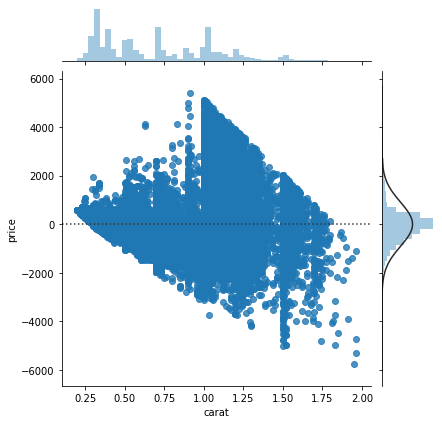

In [30]:
sns.jointplot(data=diamonds.query('carat<2 & price<10000'), y='price', x='carat', kind='residual')



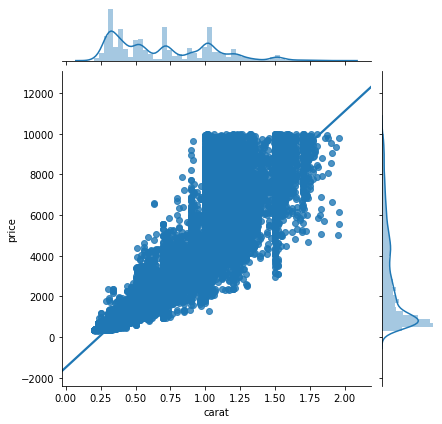

In [29]:
sns.jointplot(data=diamonds.query('carat<2 & price<10000'), y='price', x='carat', kind='reg')

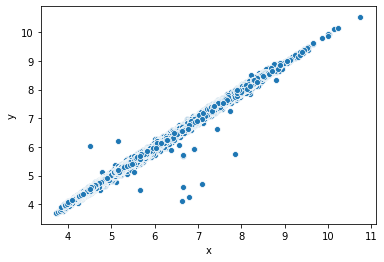

In [15]:
sns.scatterplot(data=diamonds.query('y < 20 & x > 2.5'), x='x', y='y') #how to deal with outliers

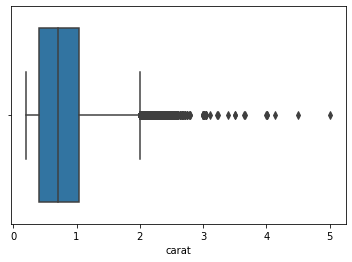

In [13]:
sns.boxplot(x='carat',data=diamonds)

AxesSubplot(0.125,0.125;0.775x0.755)


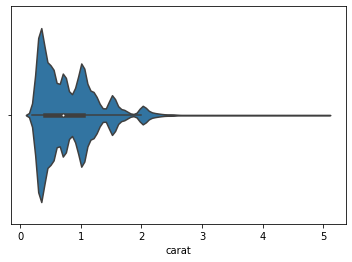

In [9]:
print(sns.violinplot(x=diamonds ['carat']))

In [ ]:
diamonds['cut'].value_counts() #for all the categorical values

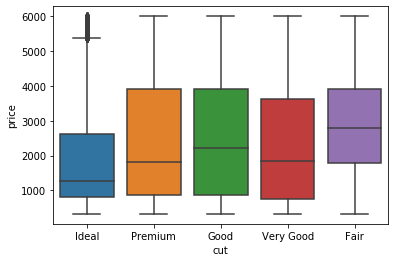

In [31]:
# your turn: how is price related to cut?
sns.boxplot(data=diamonds.query('price<6000'), x='cut', y='price') #ordering matters

# Vis Practice

In [32]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr # you might need to install this (see above)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# don't copy and paste these lists and number in several places 
# (which is what the original "simple program" did... that's bad programming!)
# instead, create a var - if we change it here, it changes everywhere
stocks = ['AAPL','MSFT','VZ']
start_yr = 2000

# load
stock_prices = pdr.get_data_yahoo(stocks, start=start_yr)
stock_prices = stock_prices.filter(like='Adj Close') # reduce to just columns with this in the name
stock_prices.columns = stocks # put their tickers as column names
stock_prices # print

,AAPL,MSFT,VZ
Date,,,
2000-01-03,3.470226,37.495686,20.721500
2000-01-04,3.177650,36.229057,20.051672
2000-01-05,3.224152,36.611080,20.721500
2000-01-06,2.945139,35.384666,20.631170
2000-01-07,3.084645,35.847076,20.478834
2000-01-10,3.030393,36.108448,20.370028
2000-01-11,2.875386,35.183617,20.179594
2000-01-12,2.702940,34.037640,19.499504
2000-01-13,2.999391,34.680992,19.347162
